# Generating Data in Python Using Scientific Packages

This notebook is meant to be be an introduction to data generation within the Python environment. Please issue a comment on my Github account if you would like to suggest any changes to this notebook. 

For more information on random variables, particularly the functions that implement their generator, refer to the [Numpy documentation](http://docs.scipy.org/doc/numpy-1.10.0/reference/routines.random.html)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Random Variables

## Uniform Random Variables 

The mean of x is  0.506072105244


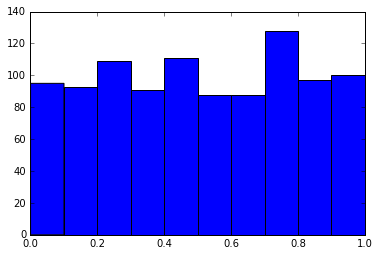

In [51]:
x = np.random.rand(1000)
d = plt.hist(x)
print "The mean of x is ", np.mean(x)

## Exponential Random Variables 

Draw samples from an exponential distribution.

Its probability density function is

$$
f(x; \frac{1}{\beta}) = \frac{1}{\beta} \exp(-\frac{x}{\beta})
$$

for $x > 0$ and $0$ elsewhere. $\beta$ is the scale parameter, which is the inverse of the rate parameter $\lambda = 1/\beta$. The rate parameter is an alternative, widely used parameterization of the exponential distribution.



The mean of x is  4.99246583133


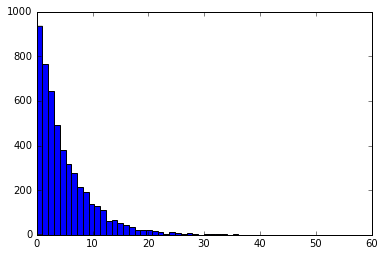

In [50]:
beta = .2
x = np.random.exponential(1/beta, 5000)
d = plt.hist(x, bins = 50)
print "The mean of x is ", np.mean(x)

## Poisson Random Variables

The Poisson distribution

$$
f(k; \lambda)=\frac{\lambda^k e^{-\lambda}}{k!}
$$

For events with an expected separation $\lambda$ the Poisson distribution $f(k; \lambda)$ describes the probability of $k$ events occurring within the observed interval $\lambda$.

Because the output is limited to the range of the C long type, a ValueError is raised when lam is within 10 sigma of the maximum representable value.



The mean of x is  4.977


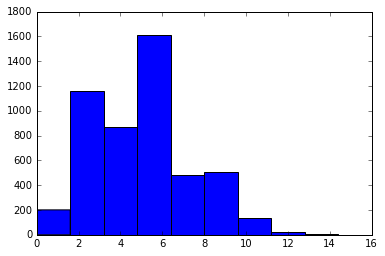

In [52]:
x = np.random.poisson(5, 5000)
d = plt.hist(x, bins=10)
print "The mean of x is ", np.mean(x)

## Normal Random Variables 

The mean of x is  0.00737366249217


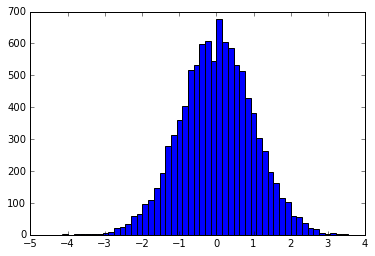

In [53]:
x = np.random.randn(10000)
d = plt.hist(x, bins=50)
print "The mean of x is ", np.mean(x)

# Multivariate Gaussian Data
This is How

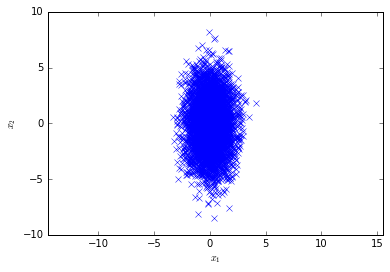

In [58]:
mean = [0, 0]
cov = [[1, 0], [0, 5]]  # diagonal covariance
x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

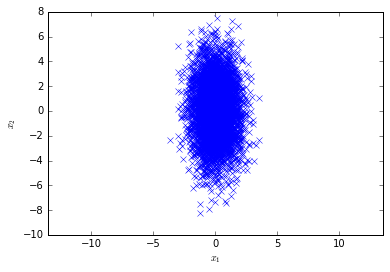

(2, 5000)
[ 0.86140864  0.38757879 -0.61685322 ...,  0.91815419 -0.16319645
 -1.03984772]


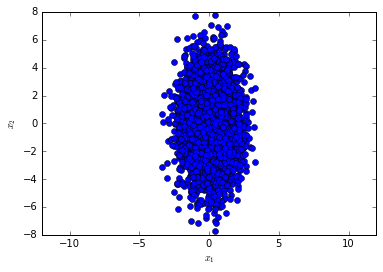

The mean of x is  [ 0.02897501  0.02813547]
The mean of x is  0.0285552411505


In [62]:
mean = [0, 0]
cov = [[1, 0], [0, 5]]  # diagonal covariance
x = np.random.multivariate_normal(mean, cov, 5000).T # NOTICE THE TRANSPOSE
plt.plot(x[0], x[1], 'x')
plt.axis('equal')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()
print x.shape
print x[0]

x = np.random.multivariate_normal(mean, cov, 5000) # NOTICE THE TRANSPOSE IS GONE
plt.plot(x[:, 0], x[:, 1], 'o')
plt.axis('equal')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()
print "The mean of x is ", np.mean(x, axis=0)  # compute the mean over axis 0 (i.e., one for each feature)
print "The mean of x is ", np.mean(x) # computes the mean of ALL of the array 

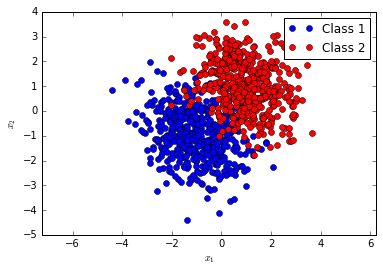

In [19]:
x = np.random.multivariate_normal([-1, -1], [[1, -.25], [-.25, 1]], 500).T
y = np.random.multivariate_normal([1, 1], [[1, -.25], [-.25, 1]], 500).T
plt.plot(x[0], x[1], 'o', c='b')
plt.plot(y[0], y[1], 'o', c='r')
plt.axis('equal')
plt.xlabel('$x_1$')  # use latex in the figure axis labels
plt.ylabel('$x_2$')
plt.legend(("Class 1", "Class 2"))
plt.show()

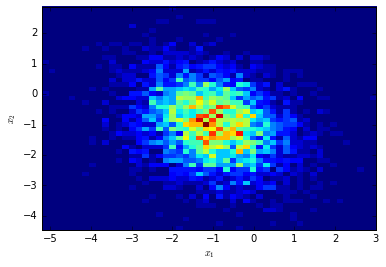

In [33]:
x = np.random.multivariate_normal([-1, -1], [[1, -.25], [-.25, 1]], 5000).T
d = plt.hist2d(x[0], x[1], bins = 50)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')


# Fun Examples of Data Generators

## Checkerboard Data

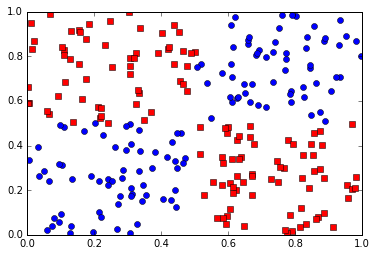

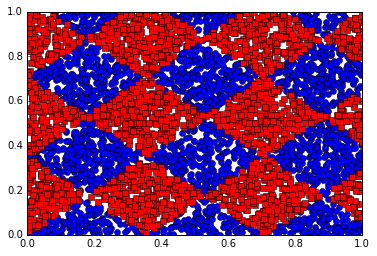

In [83]:
def gen_cb(N, a, alpha): 
    """
    N: number of points on the checkerboard
    a: width of the checker board (0<a<1)
    alpha: rotation of the checkerboard in radians 
    """
    d = np.random.rand(N, 2).T
    d_transformed = np.array([d[0]*np.cos(alpha)-d[1]*np.sin(alpha), 
                              d[0]*np.sin(alpha)+d[1]*np.cos(alpha)]).T
    s = np.ceil(d_transformed[:,0]/a)+np.floor(d_transformed[:,1]/a)
    lab = 2 - (s%2)
    data = d.T
    return data, lab 

X, y = gen_cb(250, .5, 0)
plt.plot(X[np.where(y==1)[0], 0], X[np.where(y==1)[0], 1], 'o')
plt.plot(X[np.where(y==2)[0], 0], X[np.where(y==2)[0], 1], 's', c = 'r')

X, y = gen_cb(5000, .25, 3.14159/4)
plt.figure()
plt.plot(X[np.where(y==1)[0], 0], X[np.where(y==1)[0], 1], 'o')
plt.plot(X[np.where(y==2)[0], 0], X[np.where(y==2)[0], 1], 's', c = 'r')